# The Sparks Foundation 

# Data Science and Business Analytics Internship 

# Task 2 - Prediction using Unsupervisded ML
### {For this task we will be applying KMeans Clustering algorithm for predicting the optimum number of clusters  in the  given Iris data set} 

### Data Source -  https://bit.ly/3kXTdox
### Problem statement - From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
print(iris.isnull().sum())
print('NO NULL VALUES PRESENT')

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
NO NULL VALUES PRESENT


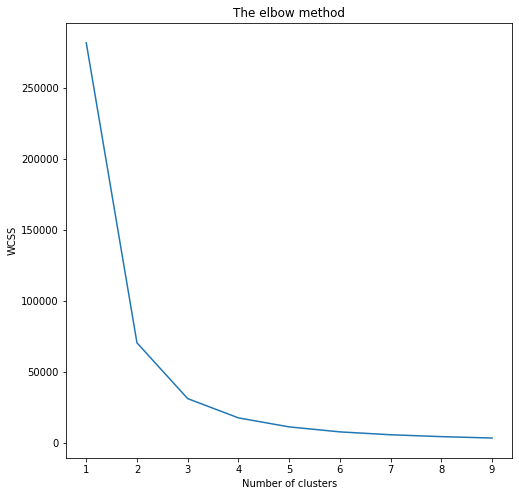

In [4]:
# Empty list for storing WCSS across all values of k
x = iris.iloc[:, [0, 1, 2, 3]].values
dist = []

# Iterate from 1-9
for i in range(1,10):
    # Initialize KMeans algorithm
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit on data
    km.fit(x)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.plot(range(1,10),dist)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
# Line plot # clusters on X-axis and WCSS 

In [5]:
#training the model
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

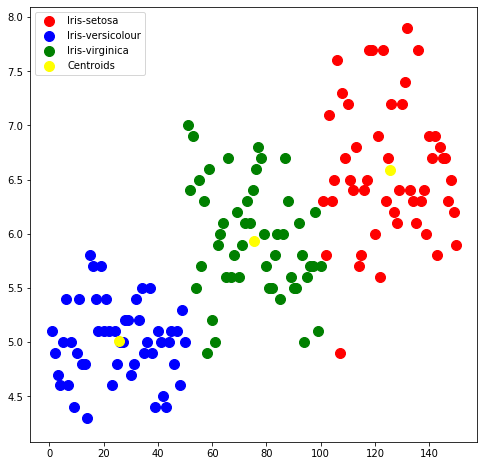

In [6]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()